In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['label', 'message'])


In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.columns

Index(['label', 'message'], dtype='object')

In [6]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [8]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Text Transformation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True) 

Naive Bayes Accuracy: 0.9668161434977578


In [12]:
confusion_nb = confusion_matrix(y_test, y_pred_nb)

In [13]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

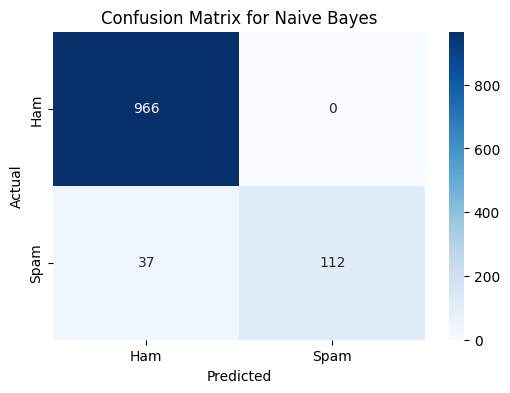

In [14]:
plot_confusion_matrix(confusion_nb, 'Naive Bayes')

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True) 

Logistic Regression Accuracy: 0.9641255605381166


In [16]:
confusion_lr = confusion_matrix(y_test, y_pred_lr)

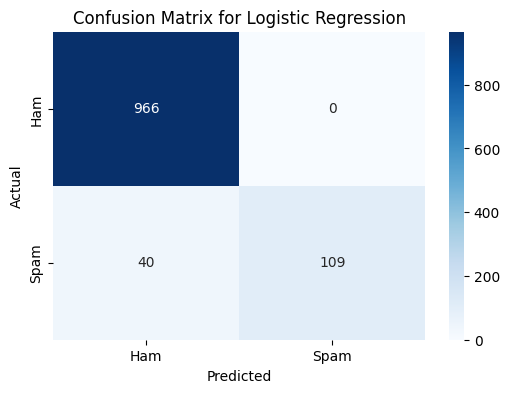

In [17]:
plot_confusion_matrix(confusion_lr, 'Logistic Regression')

In [18]:
nb_cv_scores = cross_val_score(nb_model, X, y, cv=5)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("Naive Bayes CV Scores:", nb_cv_scores.mean())
print("Logistic Regression CV Scores:", lr_cv_scores.mean())

Naive Bayes CV Scores: 0.9589013855455635
Logistic Regression CV Scores: 0.9610548180112872


In [19]:
param_grid = {'alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Performance:", classification_report(y_test, y_pred_best))

Tuned Model Performance:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.94      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [20]:
# Sample messages for testing
test_messages = [
    "Congratulations! You've won a $1000 cash prize!",
    "Hey, are we still on for the meeting tomorrow?",
    "Claim your free trial now by clicking this link!",
    "Just checking in. How have you been?",
    "Important: Your account has been compromised. Act now!"
]

# Transform the test messages using the fitted vectorizer
test_vectors = vectorizer.transform(test_messages)

# Predict the classes for the test messages using Naive Bayes
predictions = nb_model.predict(test_vectors)

# Output predictions
for i in range(len(test_messages)):
    label = 'Spam' if predictions[i] == 1 else 'Ham'
    print(f"Message: '{test_messages[i]}' - Prediction: {label}")

Message: 'Congratulations! You've won a $1000 cash prize!' - Prediction: Spam
Message: 'Hey, are we still on for the meeting tomorrow?' - Prediction: Ham
Message: 'Claim your free trial now by clicking this link!' - Prediction: Ham
Message: 'Just checking in. How have you been?' - Prediction: Ham
Message: 'Important: Your account has been compromised. Act now!' - Prediction: Ham
